# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Clustering Classification/Dataset_clustering.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Jumlah Baris: 8205
Jumlah Kolom: 20
Row ID                  float64
Order ID                  int64
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                 int64
Customer ID               int64
Customer Name             int64
Segment                   int64
Country                   int64
City                      int64
State                     int64
Postal Code             float64
Region                    int64
Product ID                int64
Category                  int64
Sub-Category              int64
Product Name              int64
Sales                   float64
Lead Time               float64
Sales_Binned              int64
dtype: object
Kolom Numerik: Index(['Row ID', 'Order ID', 'Ship Mode', 'Customer ID', 'Customer Name',
       'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Lead Time', 'Sales_Binned'],
      dtype='object')
Kolom Kategorikal

<ipython-input-34-5dd49856385f>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Postal Code'].fillna(df['Postal Code'].mean(), inplace=True)


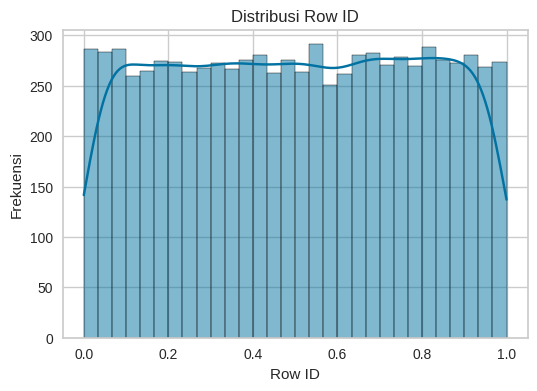

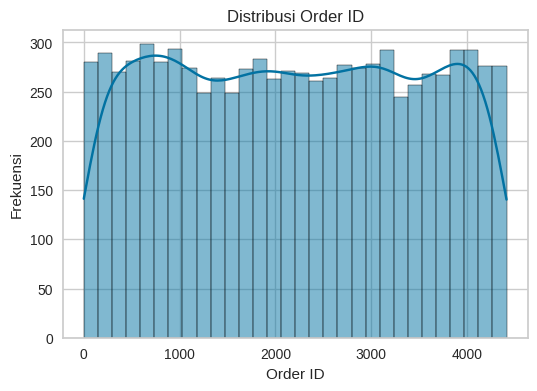

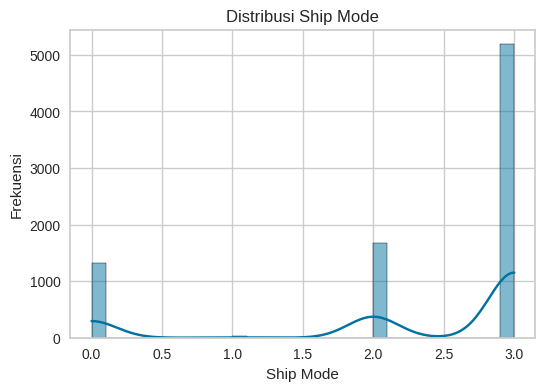

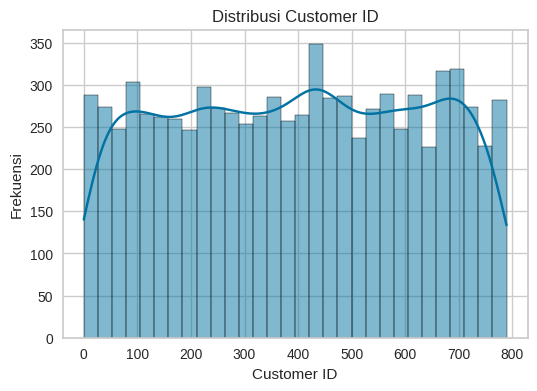

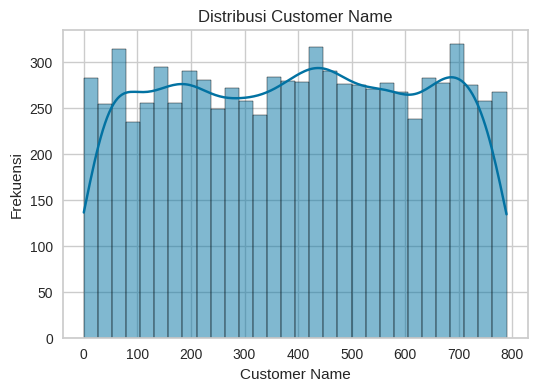

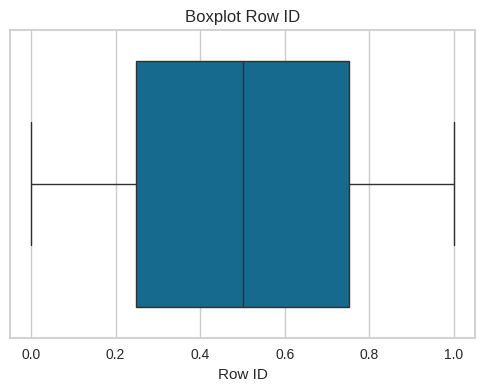

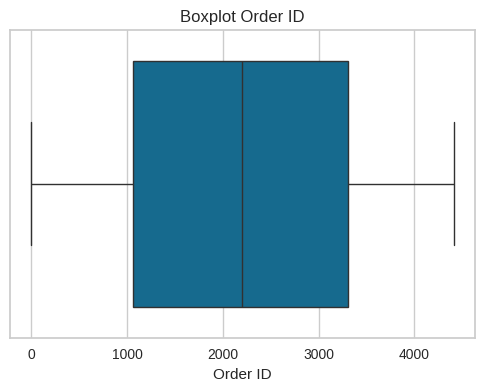

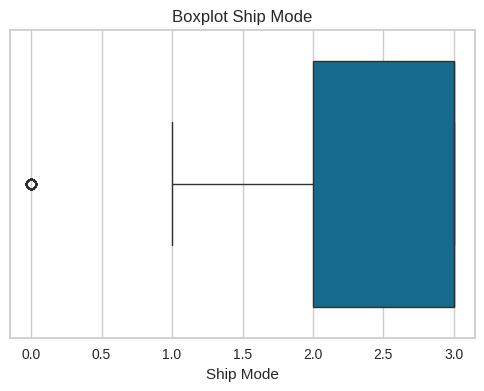

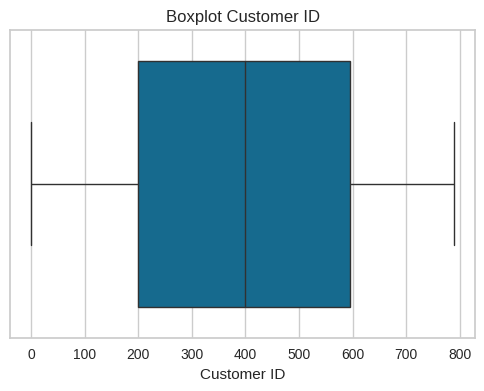

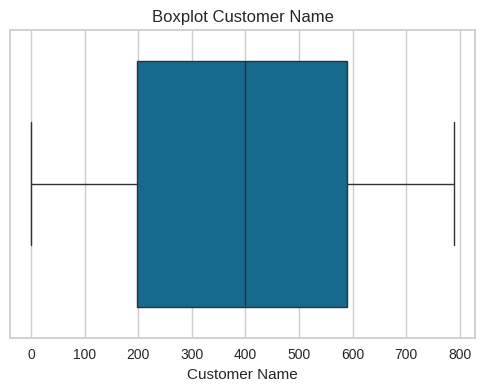

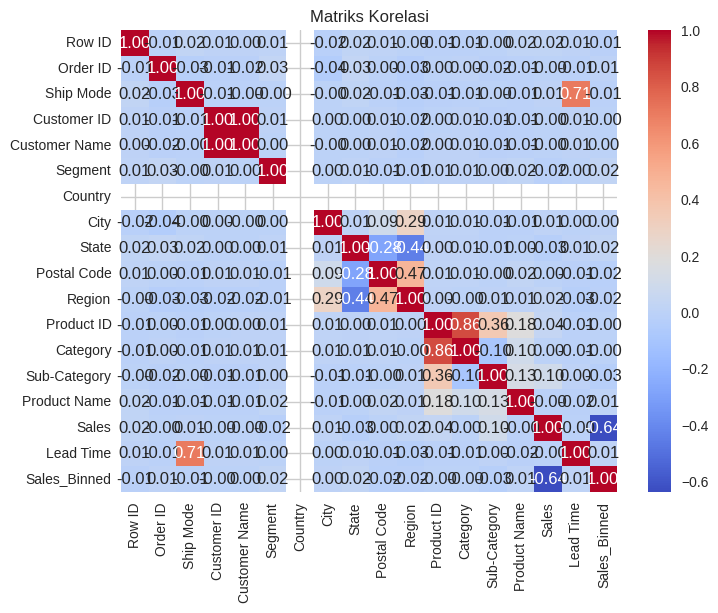

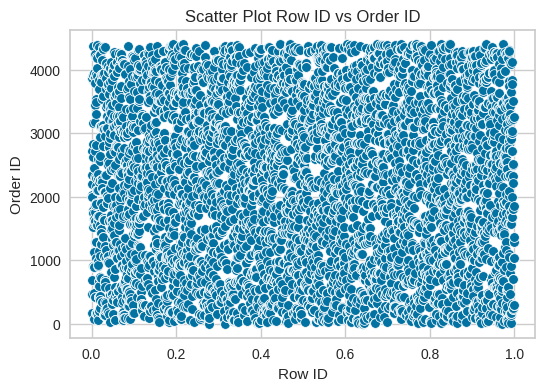

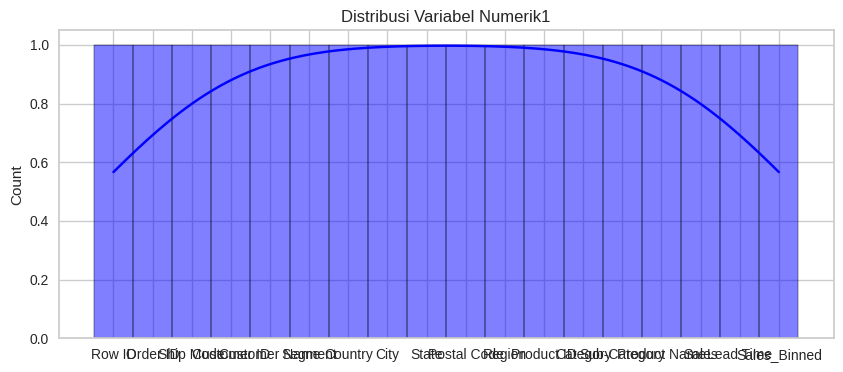

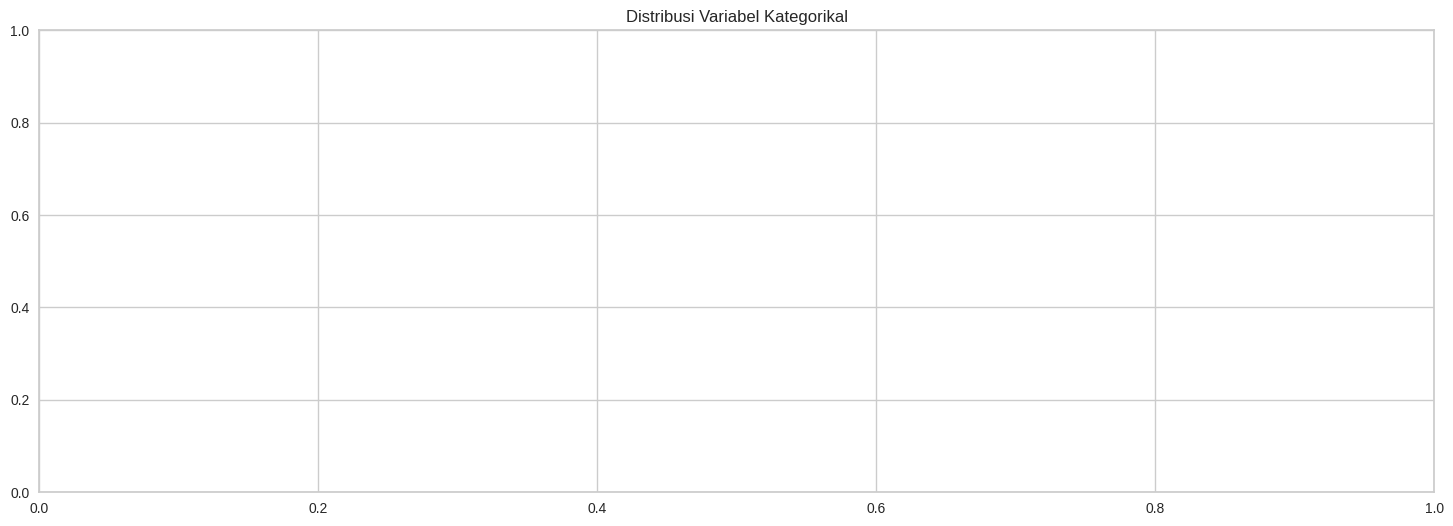

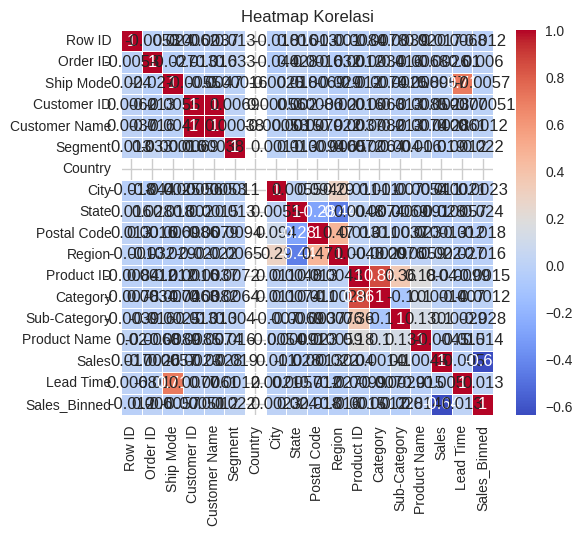

In [ ]:
# cek jumlah baris dan kolom
print(f"Jumlah Baris: {df.shape[0]}")
print(f"Jumlah Kolom: {df.shape[1]}")

# cek tipe data numerikal dan kategorikal
print(df.dtypes)
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("Kolom Numerik:", numerical_columns)
categorical_columns = df.select_dtypes(include=['object']).columns
print("Kolom Kategorikal:", categorical_columns)

# menangani missing value
print(df.isnull().sum())
df['Postal Code'].fillna(df['Postal Code'].mean(), inplace=True)
print(df.isnull().sum())  # harusnya semua nol

# statistik deskriptif
print("Statistik Deskriptif:")
print(df.describe(include='all'))

# Visualisasi distribusi dengan histogram
numerical_cols = df.select_dtypes(include=['number']).columns

for col in numerical_cols[:5]:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel("Frekuensi")
    plt.show()

for col in numerical_cols[:5]:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot {col}')
    plt.show()

# Matriks korelasi
plt.figure(figsize=(8, 6))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriks Korelasi")
plt.show()

# Scatter plot antara dua variabel numerik (ganti dengan kolom yang relevan)
if len(numerical_cols) > 1:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[numerical_cols[0]], y=df[numerical_cols[1]])
    plt.xlabel(numerical_cols[0])
    plt.ylabel(numerical_cols[1])
    plt.title(f'Scatter Plot {numerical_cols[0]} vs {numerical_cols[1]}')
    plt.show()

# Histogram & KDE Plot untuk Distribusi Data Numerik
plt.figure(figsize=(10, 4))
sns.histplot(numerical_columns, kde=True, bins=10, color='blue')
plt.title("Distribusi Variabel Numerik1")
plt.show()

# Diagram Batang untuk Variabel Kategorikal
plt.figure(figsize=(18, 6))
sns.countplot(x=categorical_columns, palette='pastel')
plt.title("Distribusi Variabel Kategorikal")
plt.show()


# Heatmap Korelasi Variabel Numerik
plt.figure(figsize=(6,5))
corr_matrix = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap Korelasi")
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

Jumlah duplikat sebelum: 0
Jumlah duplikat setelah: 0
Jumlah data setelah outlier handling: 7466 baris
Dataset setelah pembersihan dan transformasi:
     Row ID  Order ID Order Date  Ship Date  Ship Mode  Customer ID  \
0  0.000000  0.499093 2017-11-08 2017-11-11          2     0.181242   
2  0.000204  0.458296 2017-06-12 2017-06-16          2     0.300380   
4  0.000408  0.873300 2016-10-11 2016-10-18          3     0.889734   
5  0.000510  0.039891 2015-06-09 2015-06-14          3     0.111534   
6  0.000612  0.039891 2015-06-09 2015-06-14          3     0.111534   

   Customer Name  Segment  Country      City     State  Postal Code  Region  \
0       0.210393      0.0      0.0  0.369439  0.319149     0.421123       2   
2       0.254753      0.5      0.0  0.500967  0.063830     0.905710       3   
4       0.868188      0.0      0.0  0.290135  0.170213     0.328421       2   
5       0.143219      0.0      0.0  0.500967  0.063830     0.905670       3   
6       0.143219      0.0    

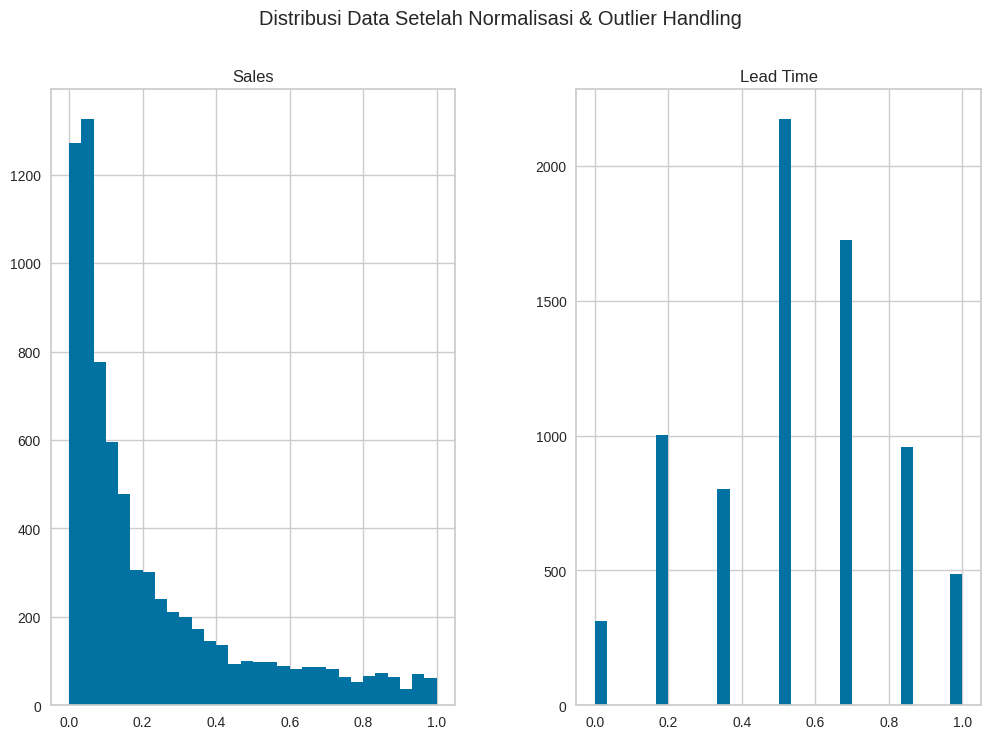

In [ ]:
# 1️⃣ Cek & Hapus Data Duplikat
print(f"Jumlah duplikat sebelum: {df.duplicated().sum()}")
df = df.drop_duplicates()
print(f"Jumlah duplikat setelah: {df.duplicated().sum()}")

# 2️⃣ Penanganan Outlier dengan IQR
numerical_columns = ['Sales', 'Lead Time']  # Sesuaikan dengan data Anda
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Filter data tanpa outlier
df = df[~((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
print(f"Jumlah data setelah outlier handling: {df.shape[0]} baris")

# 3️⃣ Label Encoding untuk Kolom Kategorikal
categorical_columns = ['Ship Mode', 'Region']  # Sesuaikan dengan dataset
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# 4️⃣ Binning Sales ke dalam 3 kategori (Low, Medium, High)
df['Sales_Binned'] = pd.qcut(df['Sales'], q=3, labels=['Low', 'Medium', 'High'])
df['Sales_Binned'] = label_encoder.fit_transform(df['Sales_Binned'])  # Ubah kategori menjadi angka

# 5️⃣ Normalisasi Data Numerik
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# 6️⃣ Statistik Deskriptif & Visualisasi
print("Dataset setelah pembersihan dan transformasi:")
print(df.head())

print("\nStatistik deskriptif setelah normalisasi & penanganan outlier:")
print(df.describe())

print(f"\nJumlah data akhir: {df.shape[0]} baris, {df.shape[1]} kolom")

# 7️⃣ Plot Distribusi Data Setelah Preprocessing
df[numerical_columns].hist(figsize=(12, 8), bins=30)
plt.suptitle("Distribusi Data Setelah Normalisasi & Outlier Handling")
plt.show()

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

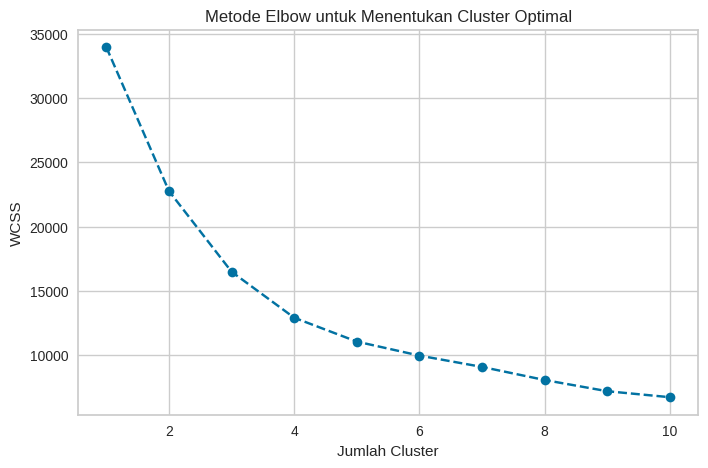

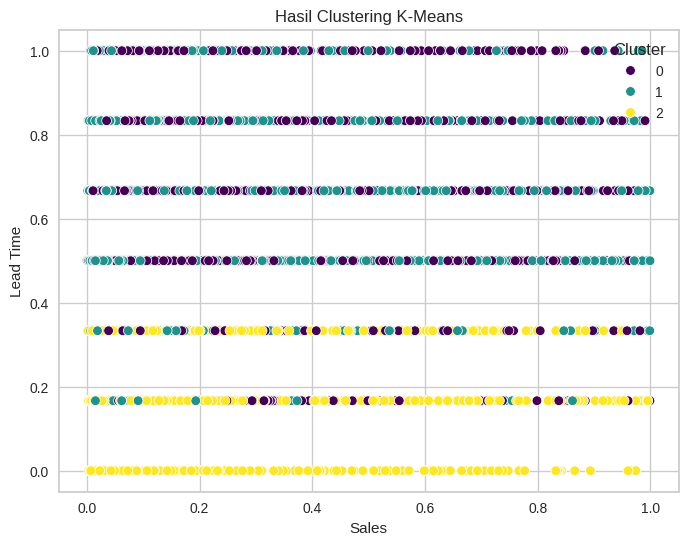

            Sales  Lead Time
Cluster                     
0        0.228598   0.612283
1        0.213930   0.617685
2        0.230348   0.187613


In [ ]:
selected_features = numerical_columns + categorical_columns  # Tidak perlu menggunakan .tolist()
df_encoded = df[selected_features].copy()


# Label Encoding untuk fitur kategorikal jika belum dilakukan sebelumnya
for col in categorical_columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Standarisasi fitur numerik
scaler = StandardScaler()
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_encoded)
    wcss.append(kmeans.inertia_)

# Visualisasi Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.title('Metode Elbow untuk Menentukan Cluster Optimal')
plt.show()
print("""
- Grafik ini memvisualisasikan bagaimana nilai WCSS berubah seiring dengan bertambahnya jumlah cluster.
- WCSS mengukur seberapa dekat titik-titik data dalam sebuah cluster dengan pusat cluster tersebut; semakin rendah WCSS, semakin baik.
- Idealnya, kita mencari 'siku' (elbow) pada grafik ini, yaitu titik di mana penambahan jumlah cluster tidak lagi secara signifikan mengurangi WCSS.
- Berdasarkan grafik ini, 'siku' terlihat berada di sekitar jumlah cluster 3 atau 4.
- Ini mengindikasikan bahwa menambahkan cluster setelah titik ini hanya memberikan sedikit peningkatan dalam homogenitas cluster, sehingga 3 atau 4 cluster mungkin merupakan pilihan yang optimal.
""")

optimal_clusters = 3  # Ganti dengan hasil dari elbow method
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_encoded)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Sales'], y=df['Lead Time'], hue=df['Cluster'], palette='viridis')
plt.title('Hasil Clustering K-Means')
plt.xlabel('Sales')
plt.ylabel('Lead Time')
plt.legend(title='Cluster')
plt.show()

print(df[['Sales', 'Lead Time', 'Cluster']].groupby('Cluster').mean())


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [ ]:
#Type your code here

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [ ]:
#Type your code here

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [ ]:
# Type your code here


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [ ]:
# Type your code here

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
# Type your code here

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.